<h1>Capstone 1</h1>
<h2>Red Wine Quality, UC Irvine</h2> 
(Source: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009)
<h4>Audrey Rager</h4>
<h4>October 18, 2020</h4>
<h2>Import Python Packages</h2>

In [1]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import datetime as dt
import statsmodels.api as sm
from scipy.stats import norm
import statsmodels.stats.weightstats as smsw
import pylab

# Import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
#from sklearn import cross_validation
from scipy import stats as st
import warnings 
warnings.filterwarnings('ignore')

# Import pyplot from matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')


<h2>Data Wrangling</h2>

In [2]:
#Import csv files into Pandas data frames
#reddf = pd.read_csv('winequality-red.csv',sep=";")
reddf = pd.read_csv('winequality-red.csv',sep=";")
df = pd.read_csv('winequality-red.csv',sep=";")
df = df.rename({'fixed acidity': 'fixed_acidity','volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar':'residual_sugar',  'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'}, axis=1)

df.describe()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<h2>Identifying and Removing Outliers</h2>
<p>A predictor variable is considered to be an outlier only if it is > Q<sub>3</sub> + 1.5 IQR. Because all skewed data are positively skewed, we only need to eliminate those values.</p>

In [3]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
ValueList = ('fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
            'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol')

for myValue in ValueList:
    #compute range of data
    myValueMax = df[myValue].max()
    myValueMin = df[myValue].min()
    myValueRange = myValueMax - myValueMin
    
    # Computing IQR
    Q1 = df[myValue].quantile(0.25)
    Q3 = df[myValue].quantile(0.75)
    IQR = Q3 - Q1
    gtdropvalue = (Q3 + (1.5 * IQR))
    ltdropvalue = (Q1 - (1.5 * IQR))
    
    index_names_right = df[df[myValue] >= gtdropvalue].index
    index_names_left = df[df[myValue] <= ltdropvalue].index
    df.drop(index_names_right, inplace = True)
    df.drop(index_names_left, inplace = True)
    
    
   

In [4]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000
mean,8.146784,0.522211,0.246000,2.180617,0.078296,14.788546,40.946256,0.996569,3.325286,0.628405,10.353377,5.637004
std,1.444025,0.164683,0.180343,0.439189,0.013741,8.587718,24.625658,0.001558,0.130173,0.112067,0.953617,0.758518
min,5.100000,0.120000,0.000000,1.200000,0.042000,1.000000,6.000000,0.992560,2.980000,0.330000,8.700000,3.000000
25%,7.100000,0.390000,0.080000,1.900000,0.069000,8.000000,22.000000,0.995515,3.230000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.240000,2.100000,0.078000,13.000000,35.000000,0.996600,3.330000,0.610000,10.100000,6.000000
75%,9.000000,0.630000,0.390000,2.400000,0.087000,20.000000,54.000000,0.997500,3.400000,0.700000,11.000000,6.000000
max,12.300000,1.005000,0.730000,3.600000,0.116000,40.000000,113.000000,1.000400,3.680000,0.940000,13.000000,8.000000


### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [5]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [6]:
sm.__version__

'0.12.0'

## Model 1


In [7]:
ym1 = df.quality
Xm1 = df.drop(['quality'],axis=1)
from sklearn.model_selection import train_test_split
Xm1_train, Xm1_test, ym1_train, ym1_test = train_test_split(Xm1, ym1, test_size=0.25, random_state=101)
Xm1_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
471,9.6,0.54,0.42,2.4,0.081,25.0,52.0,0.99700,3.20,0.71,11.4
1117,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
1483,8.1,0.33,0.44,1.5,0.042,6.0,12.0,0.99542,3.35,0.61,10.7
1209,6.2,0.39,0.43,2.0,0.071,14.0,24.0,0.99428,3.45,0.87,11.2
714,9.9,0.74,0.28,2.6,0.078,21.0,77.0,0.99800,3.28,0.51,9.8


In [8]:
Xm1_train.shape

(851, 11)

In [9]:
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(Xm1_train,ym1_train)
print('Estimated intercept coefficient:',lm1.intercept_)
print ('Number of coefficients:', len(lm1.coef_))
coeffm1_df = pd.DataFrame(lm1.coef_,Xm1.columns,columns=['Coefficient'])
coeffm1_df

Estimated intercept coefficient: -1.551371686446882
Number of coefficients: 11


,Coefficient
fixed_acidity,-0.002765
volatile_acidity,-0.883854
citric_acid,-0.294493
residual_sugar,0.041017
chlorides,-1.690586
free_sulfur_dioxide,0.004458
total_sulfur_dioxide,-0.002784
density,6.144114
pH,-0.744104
sulphates,1.807592


In [10]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
ym1, Xm1 = dmatrices('quality ~ fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol', data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vifm1 = pd.DataFrame()
vifm1['VIF'] = [variance_inflation_factor(Xm1.values, i) for i in range(Xm1.shape[1])]
vifm1['variable'] = Xm1.columns

#view VIF for each explanatory variable 
vifm1

,VIF,variable
0,2.539788e+06,Intercept
1,6.809390e+00,fixed_acidity
2,2.060065e+00,volatile_acidity
3,3.148410e+00,citric_acid
4,1.712597e+00,residual_sugar
5,1.286184e+00,chlorides
6,1.906135e+00,free_sulfur_dioxide
7,2.096684e+00,total_sulfur_dioxide
8,6.416265e+00,density
9,3.111450e+00,pH


In [11]:
predictions_m1 = lm1.predict(Xm1_test)

**Predicted vs. Actual**

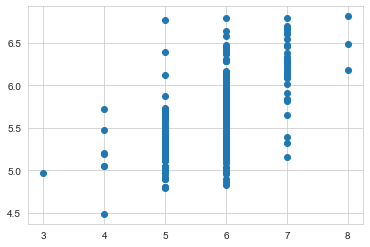

In [12]:
plt.scatter(ym1_test,predictions_m1)

**Residual Histogram**

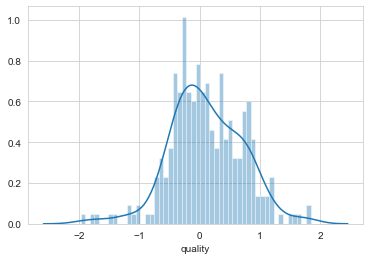

In [13]:
sns.distplot((ym1_test-predictions_m1),bins=50);

In [14]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym1_test, predictions_m1))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym1_test, predictions_m1))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym1_test, predictions_m1)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym1_test, predictions_m1))
print('Explained Variance:', metrics.explained_variance_score(ym1_test, predictions_m1))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym1_test, predictions_m1))
print('Median Absolute Error:', metrics.median_absolute_error(ym1_test, predictions_m1))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym1_test, predictions_m1))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym1_test, predictions_m1))



R-squared: 0.3877803434451649
Mean Squared Error (MSE): 0.3689591978999383
Root Mean Squared Error (RMSE): 0.6074201164761819
Log Mean Squared Error: 0.008410523071230242
Explained Variance: 0.4076396406846493
Mean Absolute Error (MAE): 0.47102853228278285
Median Absolute Error: 0.38602814037728894
Poisson Deviance: 0.0653834091445336
Mean Gamma Deviance: 0.011774809412721375


## Backward Elimination Method to create subsequent models

## Model 2 -  Drop Fixed Acidity

In [15]:
ym2 = df.quality
Xm2 = df.drop(['quality','fixed_acidity'],axis=1)
from sklearn.model_selection import train_test_split
Xm2_train, Xm2_test, ym2_train, ym2_test = train_test_split(Xm2, ym2, test_size=0.25, random_state=101)
Xm2_train.head()

,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
471,0.54,0.42,2.4,0.081,25.0,52.0,0.99700,3.20,0.71,11.4
1117,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
1483,0.33,0.44,1.5,0.042,6.0,12.0,0.99542,3.35,0.61,10.7
1209,0.39,0.43,2.0,0.071,14.0,24.0,0.99428,3.45,0.87,11.2
714,0.74,0.28,2.6,0.078,21.0,77.0,0.99800,3.28,0.51,9.8


In [16]:
from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()
lm2.fit(Xm2_train,ym2_train)
print('Estimated intercept coefficient:',lm2.intercept_)
print ('Number of coefficients:', len(lm2.coef_))
coeffm2_df = pd.DataFrame(lm2.coef_,Xm2.columns,columns=['Coefficient'])
coeffm2_df

Estimated intercept coefficient: 0.18088585722992168
Number of coefficients: 10


,Coefficient
volatile_acidity,-0.884488
citric_acid,-0.298908
residual_sugar,0.042064
chlorides,-1.671603
free_sulfur_dioxide,0.004454
total_sulfur_dioxide,-0.002773
density,4.342602
pH,-0.728176
sulphates,1.808540
alcohol,0.290546


In [17]:
predictions_m2 = lm2.predict(Xm2_test)

**Predicted vs. Actual**

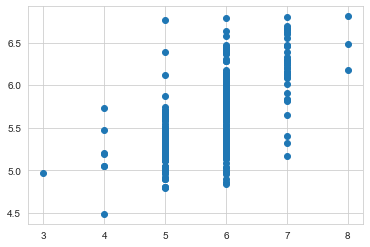

In [18]:
plt.scatter(ym2_test,predictions_m2)

**Residual Histogram**

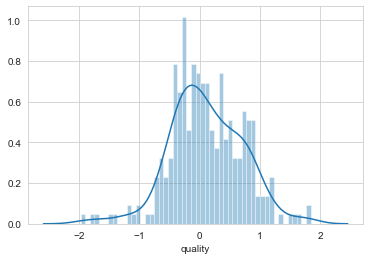

In [19]:
sns.distplot((ym2_test-predictions_m2),bins=50);

In [20]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym2_test, predictions_m2))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym2_test, predictions_m2))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym2_test, predictions_m2)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym2_test, predictions_m2))
print('Explained Variance:', metrics.explained_variance_score(ym2_test, predictions_m2))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym2_test, predictions_m2))
print('Median Absolute Error:', metrics.median_absolute_error(ym2_test, predictions_m2))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym2_test, predictions_m2))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym2_test, predictions_m2))



R-squared: 0.38793927017112706
Mean Squared Error (MSE): 0.36886341940490297
Root Mean Squared Error (RMSE): 0.6073412709547269
Log Mean Squared Error: 0.008408086672422654
Explained Variance: 0.40786428980907896
Mean Absolute Error (MAE): 0.4709996076842833
Median Absolute Error: 0.38797601869871023
Poisson Deviance: 0.06536547731859796
Mean Gamma Deviance: 0.011771384169976338


## Model 3: Drop Total Sulfur Dioxide


In [21]:
ym3 = df.quality
Xm3 = df.drop(['quality','fixed_acidity','total_sulfur_dioxide'],axis=1)
from sklearn.model_selection import train_test_split
Xm3_train, Xm3_test, ym3_train, ym3_test = train_test_split(Xm3, ym3, test_size=0.25, random_state=101)
Xm3_train.head()

,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol
471,0.54,0.42,2.4,0.081,25.0,0.99700,3.20,0.71,11.4
1117,0.69,0.07,2.5,0.091,15.0,0.99572,3.38,0.60,11.3
1483,0.33,0.44,1.5,0.042,6.0,0.99542,3.35,0.61,10.7
1209,0.39,0.43,2.0,0.071,14.0,0.99428,3.45,0.87,11.2
714,0.74,0.28,2.6,0.078,21.0,0.99800,3.28,0.51,9.8


In [22]:
Xm3_train.shape

(851, 9)

In [23]:
from sklearn.linear_model import LinearRegression
lm3 = LinearRegression()
lm3.fit(Xm3_train,ym3_train)
print('Estimated intercept coefficient:',lm3.intercept_)
print ('Number of coefficients:', len(lm3.coef_))
coeffm1_df = pd.DataFrame(lm3.coef_,Xm3.columns,columns=['Coefficient'])
coeffm1_df

Estimated intercept coefficient: -6.888743251612837
Number of coefficients: 9


,Coefficient
volatile_acidity,-0.931911
citric_acid,-0.378605
residual_sugar,0.015109
chlorides,-1.992649
free_sulfur_dioxide,-0.000463
density,11.260088
pH,-0.728423
sulphates,1.839051
alcohol,0.314250


In [24]:
predictions_m3 = lm3.predict(Xm3_test)

**Predicted vs. Actual**

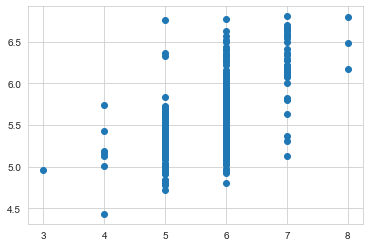

In [25]:
plt.scatter(ym3_test,predictions_m3)

**Residual Histogram**

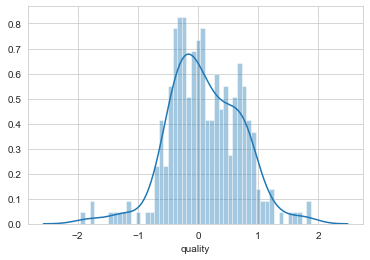

In [26]:
sns.distplot((ym3_test-predictions_m3),bins=50);

In [27]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym3_test, predictions_m3))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym3_test, predictions_m3))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym3_test, predictions_m3)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym3_test, predictions_m3))
print('Explained Variance:', metrics.explained_variance_score(ym3_test, predictions_m3))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym3_test, predictions_m3))
print('Median Absolute Error:', metrics.median_absolute_error(ym3_test, predictions_m3))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym3_test, predictions_m3))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym3_test, predictions_m3))



R-squared: 0.3876008958362349
Mean Squared Error (MSE): 0.36906734347342157
Root Mean Squared Error (RMSE): 0.6075091303621877
Log Mean Squared Error: 0.008398696251828463
Explained Variance: 0.4069132089345229
Mean Absolute Error (MAE): 0.47422021905377176
Median Absolute Error: 0.39005818429997774
Poisson Deviance: 0.06533117034209597
Mean Gamma Deviance: 0.011751739171228348


## Model 4: Drop Free Sulfur Dioxide

In [28]:
ym4 = df.quality
Xm4 = df.drop(['quality','fixed_acidity','total_sulfur_dioxide','free_sulfur_dioxide'],axis=1)
from sklearn.model_selection import train_test_split
Xm4_train, Xm4_test, ym4_train, ym4_test = train_test_split(Xm4, ym4, test_size=0.25, random_state=101)
Xm4_train.head()


,volatile_acidity,citric_acid,residual_sugar,chlorides,density,pH,sulphates,alcohol
471,0.54,0.42,2.4,0.081,0.99700,3.20,0.71,11.4
1117,0.69,0.07,2.5,0.091,0.99572,3.38,0.60,11.3
1483,0.33,0.44,1.5,0.042,0.99542,3.35,0.61,10.7
1209,0.39,0.43,2.0,0.071,0.99428,3.45,0.87,11.2
714,0.74,0.28,2.6,0.078,0.99800,3.28,0.51,9.8


In [29]:
Xm4_train.shape

(851, 8)

In [30]:
lm4 = LinearRegression()
lm4.fit(Xm4_train,ym4_train)
print('Estimated intercept coefficient:',lm4.intercept_)
print ('Number of coefficients:', len(lm4.coef_))
coeffm4_df = pd.DataFrame(lm4.coef_,Xm4.columns,columns=['Coefficient'])
coeffm4_df

Estimated intercept coefficient: -7.386974172859908
Number of coefficients: 8


,Coefficient
volatile_acidity,-0.930590
citric_acid,-0.377355
residual_sugar,0.013524
chlorides,-1.998243
density,11.766596
pH,-0.733249
sulphates,1.833004
alcohol,0.315151


In [31]:
predictions_m4 = lm4.predict(Xm4_test)

**Predicted vs. Actual**

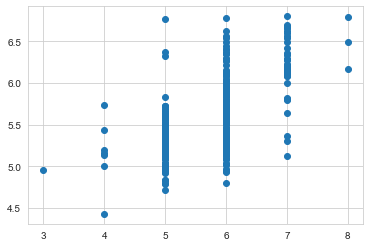

In [32]:
plt.scatter(ym1_test,predictions_m4)

**Residual Histogram**

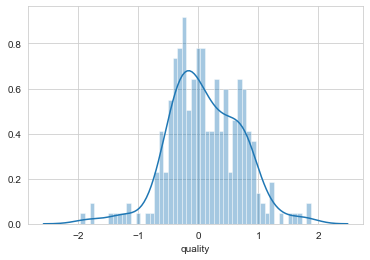

In [33]:
sns.distplot((ym4_test-predictions_m4),bins=50);

In [34]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym4_test, predictions_m4))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym4_test, predictions_m4))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym4_test, predictions_m4)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym4_test, predictions_m4))
print('Explained Variance:', metrics.explained_variance_score(ym4_test, predictions_m4))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym4_test, predictions_m4))
print('Median Absolute Error:', metrics.median_absolute_error(ym4_test, predictions_m4))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym4_test, predictions_m4))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym4_test, predictions_m4))

R-squared: 0.3870396847996227
Mean Squared Error (MSE): 0.3694055619081028
Root Mean Squared Error (RMSE): 0.6077874315154129
Log Mean Squared Error: 0.008403916612255551
Explained Variance: 0.4063945211437555
Mean Absolute Error (MAE): 0.4742946877191692
Median Absolute Error: 0.38599748420110114
Poisson Deviance: 0.06538035668771373
Mean Gamma Deviance: 0.011758886505863902


## Model 5: Drop Residual Sugar


In [35]:
ym5 = df.quality
Xm5 = df.drop(['quality','fixed_acidity','total_sulfur_dioxide','free_sulfur_dioxide','residual_sugar'],axis=1)
from sklearn.model_selection import train_test_split
Xm5_train, Xm5_test, ym5_train, ym5_test = train_test_split(Xm5, ym5, test_size=0.25, random_state=101)
Xm5_train.head()




,volatile_acidity,citric_acid,chlorides,density,pH,sulphates,alcohol
471,0.54,0.42,0.081,0.99700,3.20,0.71,11.4
1117,0.69,0.07,0.091,0.99572,3.38,0.60,11.3
1483,0.33,0.44,0.042,0.99542,3.35,0.61,10.7
1209,0.39,0.43,0.071,0.99428,3.45,0.87,11.2
714,0.74,0.28,0.078,0.99800,3.28,0.51,9.8


In [36]:
Xm5_train.shape

(851, 7)

In [37]:
from sklearn.linear_model import LinearRegression
lm5 = LinearRegression()
lm5.fit(Xm5_train,ym5_train)
print('Estimated intercept coefficient:',lm5.intercept_)
print ('Number of coefficients:', len(lm5.coef_))
coeffm5_df = pd.DataFrame(lm5.coef_,Xm5.columns,columns=['Coefficient'])
coeffm5_df

Estimated intercept coefficient: -10.042002794433841
Number of coefficients: 7


,Coefficient
volatile_acidity,-0.930902
citric_acid,-0.381527
chlorides,-1.943687
density,14.417288
pH,-0.731417
sulphates,1.826377
alcohol,0.318802


In [38]:
predictions_m5 = lm5.predict(Xm5_test)

**Predicted vs. Actual**

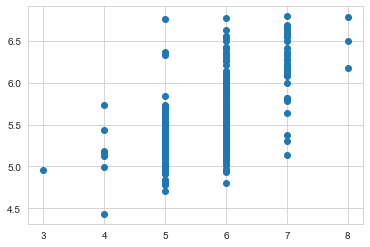

In [39]:
plt.scatter(ym5_test,predictions_m5)

**Residual Histogram**

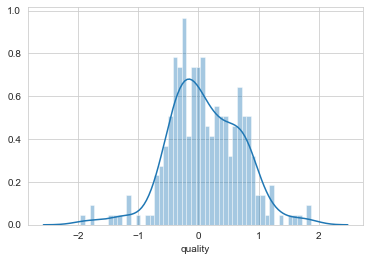

In [40]:
sns.distplot((ym5_test-predictions_m5),bins=50);

In [41]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym5_test, predictions_m5))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym5_test, predictions_m5))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym5_test, predictions_m5)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym5_test, predictions_m5))
print('Explained Variance:', metrics.explained_variance_score(ym5_test, predictions_m5))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym5_test, predictions_m5))
print('Median Absolute Error:', metrics.median_absolute_error(ym5_test, predictions_m5))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym5_test, predictions_m5))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym5_test, predictions_m5))



R-squared: 0.3875135463361725
Mean Squared Error (MSE): 0.3691199853661392
Root Mean Squared Error (RMSE): 0.6075524548268563
Log Mean Squared Error: 0.008396826045004729
Explained Variance: 0.40702615060806213
Mean Absolute Error (MAE): 0.4741334046184682
Median Absolute Error: 0.3896675175901967
Poisson Deviance: 0.06532777527680488
Mean Gamma Deviance: 0.011749130952287955



## Model 6: Drop Alcohol



In [42]:
ym6 = df.quality
Xm6 = df.drop(['quality','fixed_acidity','total_sulfur_dioxide','free_sulfur_dioxide','residual_sugar','alcohol'],axis=1)
from sklearn.model_selection import train_test_split
Xm6_train, Xm6_test, ym6_train, ym6_test = train_test_split(Xm6, ym6, test_size=0.25, random_state=101)
Xm6_train.head()


,volatile_acidity,citric_acid,chlorides,density,pH,sulphates
471,0.54,0.42,0.081,0.99700,3.20,0.71
1117,0.69,0.07,0.091,0.99572,3.38,0.60
1483,0.33,0.44,0.042,0.99542,3.35,0.61
1209,0.39,0.43,0.071,0.99428,3.45,0.87
714,0.74,0.28,0.078,0.99800,3.28,0.51


In [43]:
Xm6_train.shape

(851, 6)

In [44]:
from sklearn.linear_model import LinearRegression
lm6 = LinearRegression()
lm6.fit(Xm6_train,ym6_train)
print('Estimated intercept coefficient:',lm6.intercept_)
print ('Number of coefficients:', len(lm6.coef_))
coeffm6_df = pd.DataFrame(lm6.coef_,Xm6.columns,columns=['Coefficient'])
coeffm6_df


Estimated intercept coefficient: 116.18916091986519
Number of coefficients: 6


,Coefficient
volatile_acidity,-0.743266
citric_acid,0.335291
chlorides,-3.104999
density,-110.410118
pH,-0.442476
sulphates,2.354861


In [45]:
predictions_m6 = lm6.predict(Xm6_test)

**Predicted vs. Actual**

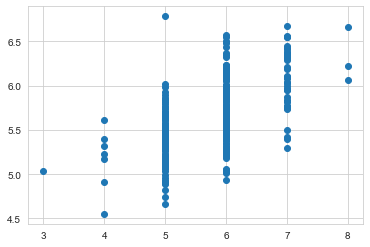

In [46]:
plt.scatter(ym6_test,predictions_m6)

**Residual Histogram**

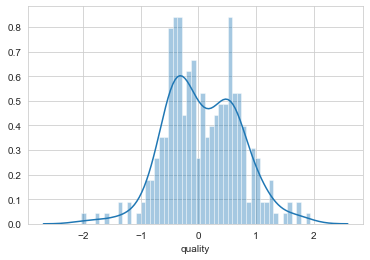

In [47]:
sns.distplot((ym6_test-predictions_m6),bins=50);

In [48]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym6_test, predictions_m6))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym6_test, predictions_m6))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym6_test, predictions_m6)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym6_test, predictions_m6))
print('Explained Variance:', metrics.explained_variance_score(ym6_test, predictions_m6))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym6_test, predictions_m6))
print('Median Absolute Error:', metrics.median_absolute_error(ym6_test, predictions_m6))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym6_test, predictions_m6))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym6_test, predictions_m6))



R-squared: 0.319629339282119
Mean Squared Error (MSE): 0.4100309595835989
Root Mean Squared Error (RMSE): 0.6403365986601101
Log Mean Squared Error: 0.009264310965518188
Explained Variance: 0.3297155518642425
Mean Absolute Error (MAE): 0.5228184201654108
Median Absolute Error: 0.4626209131614445
Poisson Deviance: 0.07221132991967104
Mean Gamma Deviance: 0.012908422006617482


## Model 7: Drop Citric Acid

In [49]:
ym7 = df.quality
Xm7 = df.drop(['quality','fixed_acidity','total_sulfur_dioxide','free_sulfur_dioxide','residual_sugar','alcohol','residual_sugar','citric_acid'],axis=1)
from sklearn.model_selection import train_test_split
Xm7_train, Xm7_test, ym7_train, ym7_test = train_test_split(Xm7, ym7, test_size=0.25, random_state=101)
Xm7_train.head()


,volatile_acidity,chlorides,density,pH,sulphates
471,0.54,0.081,0.99700,3.20,0.71
1117,0.69,0.091,0.99572,3.38,0.60
1483,0.33,0.042,0.99542,3.35,0.61
1209,0.39,0.071,0.99428,3.45,0.87
714,0.74,0.078,0.99800,3.28,0.51


In [50]:
Xm7_train.shape

(851, 5)

In [51]:
from sklearn.linear_model import LinearRegression
lm7 = LinearRegression()
lm7.fit(Xm7_train,ym7_train)
print('Estimated intercept coefficient:',lm7.intercept_)
print ('Number of coefficients:', len(lm7.coef_))
coeffm7_df = pd.DataFrame(lm7.coef_,Xm7.columns,columns=['Coefficient'])
coeffm7_df

Estimated intercept coefficient: 106.88187093438654
Number of coefficients: 5


,Coefficient
volatile_acidity,-0.950469
chlorides,-3.145851
density,-100.456659
pH,-0.574259
sulphates,2.385565


In [52]:
predictions_m7 = lm7.predict(Xm7_test)

**Predicted vs. Actual**

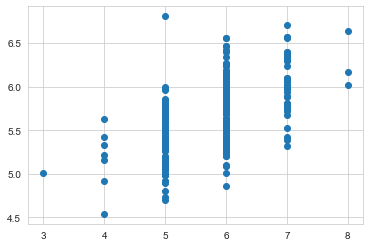

In [53]:
plt.scatter(ym7_test,predictions_m7)

**Residual Histogram**

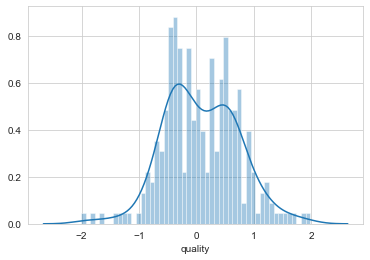

In [54]:
sns.distplot((ym7_test-predictions_m7),bins=50);

In [55]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym7_test, predictions_m7))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym7_test, predictions_m7))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym7_test, predictions_m7)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym7_test, predictions_m7))
print('Explained Variance:', metrics.explained_variance_score(ym7_test, predictions_m7))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym7_test, predictions_m7))
print('Median Absolute Error:', metrics.median_absolute_error(ym7_test, predictions_m7))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym7_test, predictions_m7))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym7_test, predictions_m7))


R-squared: 0.31596307984509486
Mean Squared Error (MSE): 0.4122404609066855
Root Mean Squared Error (RMSE): 0.6420595462312553
Log Mean Squared Error: 0.009292449815199586
Explained Variance: 0.3268769515457227
Mean Absolute Error (MAE): 0.5212012018887185
Median Absolute Error: 0.4497877470103404
Poisson Deviance: 0.0725283548651203
Mean Gamma Deviance: 0.012951891259697604


## Model 8: Drop pH

In [56]:
ym8 = df.quality
Xm8 = df.drop(['quality','fixed_acidity','total_sulfur_dioxide','free_sulfur_dioxide','residual_sugar','alcohol','residual_sugar','citric_acid','pH'],axis=1)
from sklearn.model_selection import train_test_split
Xm8_train, Xm8_test, ym8_train, ym8_test = train_test_split(Xm8, ym8, test_size=0.25, random_state=101)
Xm8_train.head()

,volatile_acidity,chlorides,density,sulphates
471,0.54,0.081,0.99700,0.71
1117,0.69,0.091,0.99572,0.60
1483,0.33,0.042,0.99542,0.61
1209,0.39,0.071,0.99428,0.87
714,0.74,0.078,0.99800,0.51


In [57]:
Xm8_train.shape

(851, 4)

In [58]:
from sklearn.linear_model import LinearRegression
lm8 = LinearRegression()
lm8.fit(Xm8_train,ym8_train)
print('Estimated intercept coefficient:',lm8.intercept_)
print ('Number of coefficients:', len(lm8.coef_))
coeffm8_df = pd.DataFrame(lm8.coef_,Xm8.columns,columns=['Coefficient'])
coeffm8_df

Estimated intercept coefficient: 93.19991012631469
Number of coefficients: 4


,Coefficient
volatile_acidity,-1.080795
chlorides,-2.609693
density,-88.581503
sulphates,2.326790


In [59]:
predictions_m8 = lm8.predict(Xm8_test)

**Predicted vs. Actual**

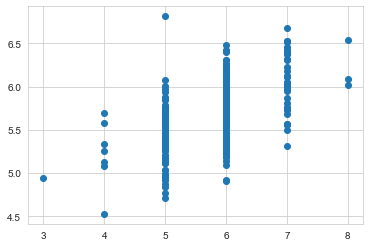

In [60]:
plt.scatter(ym8_test,predictions_m8)

**Residual Histogram**

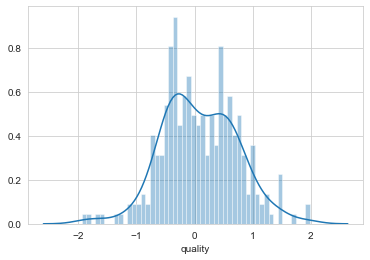

In [61]:
sns.distplot((ym8_test-predictions_m8),bins=50);

In [62]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym8_test, predictions_m8))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym8_test, predictions_m8))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym8_test, predictions_m8)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym8_test, predictions_m8))
print('Explained Variance:', metrics.explained_variance_score(ym8_test, predictions_m8))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym8_test, predictions_m8))
print('Median Absolute Error:', metrics.median_absolute_error(ym8_test, predictions_m8))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym8_test, predictions_m8))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym8_test, predictions_m8))


R-squared: 0.3084117903577951
Mean Squared Error (MSE): 0.4167913074574526
Root Mean Squared Error (RMSE): 0.6455937634902095
Log Mean Squared Error: 0.00938775902205583
Explained Variance: 0.32040575073998057
Mean Absolute Error (MAE): 0.5205790882546276
Median Absolute Error: 0.44263335482617094
Poisson Deviance: 0.07327606131422373
Mean Gamma Deviance: 0.01307437614093035


## Model 9: Drop Sulphates

In [63]:
ym9 = df.quality
Xm9 = df.drop(['quality','fixed_acidity','total_sulfur_dioxide','free_sulfur_dioxide','residual_sugar','alcohol','residual_sugar','citric_acid','pH','sulphates'],axis=1)
from sklearn.model_selection import train_test_split
Xm9_train, Xm9_test, ym9_train, ym9_test = train_test_split(Xm9, ym9, test_size=0.25, random_state=101)
Xm9_train.head()


,volatile_acidity,chlorides,density
471,0.54,0.081,0.99700
1117,0.69,0.091,0.99572
1483,0.33,0.042,0.99542
1209,0.39,0.071,0.99428
714,0.74,0.078,0.99800


In [64]:
Xm9_train.shape

(851, 3)

In [65]:
from sklearn.linear_model import LinearRegression
lm9 = LinearRegression()
lm9.fit(Xm9_train,ym9_train)
print('Estimated intercept coefficient:',lm9.intercept_)
print ('Number of coefficients:', len(lm9.coef_))
coeffm9_df = pd.DataFrame(lm9.coef_,Xm9.columns,columns=['Coefficient'])
coeffm9_df


Estimated intercept coefficient: 77.30685835232435
Number of coefficients: 3


,Coefficient
volatile_acidity,-1.599122
chlorides,-4.094841
density,-70.778485


In [66]:
predictions_m9 = lm9.predict(Xm9_test)

**Predicted vs. Actual**

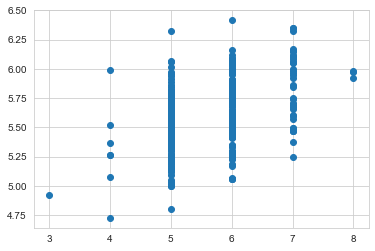

In [67]:
plt.scatter(ym9_test,predictions_m9)

**Residual Histogram**

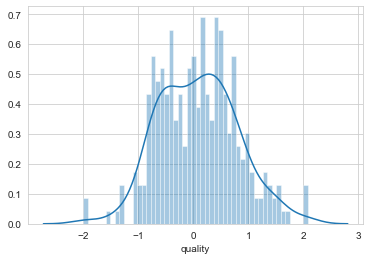

In [68]:
sns.distplot((ym9_test-predictions_m9),bins=50);

In [69]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym9_test, predictions_m9))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym9_test, predictions_m9))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym9_test, predictions_m9)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym9_test, predictions_m9))
print('Explained Variance:', metrics.explained_variance_score(ym9_test, predictions_m9))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym9_test, predictions_m9))
print('Median Absolute Error:', metrics.median_absolute_error(ym9_test, predictions_m9))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym9_test, predictions_m9))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym9_test, predictions_m9))


R-squared: 0.15968874996653526
Mean Squared Error (MSE): 0.5064204676853136
Root Mean Squared Error (RMSE): 0.7116322559337186
Log Mean Squared Error: 0.01130629079169475
Explained Variance: 0.1719480601103205
Mean Absolute Error (MAE): 0.5778978013351344
Median Absolute Error: 0.509483586383233
Poisson Deviance: 0.08884461873779294
Mean Gamma Deviance: 0.015783531521732192


## Model 10: Drop Volatile Acidity

In [70]:
ym10 = df.quality
Xm10 = df.drop(['quality','fixed_acidity','total_sulfur_dioxide','free_sulfur_dioxide','residual_sugar','alcohol','residual_sugar','citric_acid','pH','sulphates'],axis=1)
from sklearn.model_selection import train_test_split
Xm10_train, Xm10_test, ym10_train, ym10_test = train_test_split(Xm10, ym10, test_size=0.25, random_state=101)
Xm10_train.head()


,volatile_acidity,chlorides,density
471,0.54,0.081,0.99700
1117,0.69,0.091,0.99572
1483,0.33,0.042,0.99542
1209,0.39,0.071,0.99428
714,0.74,0.078,0.99800


In [71]:
Xm10_train.shape

(851, 3)

In [72]:
from sklearn.linear_model import LinearRegression
lm10 = LinearRegression()
lm10.fit(Xm10_train,ym10_train)
print('Estimated intercept coefficient:',lm10.intercept_)
print ('Number of coefficients:', len(lm10.coef_))
coeffm10_df = pd.DataFrame(lm10.coef_,Xm10.columns,columns=['Coefficient'])
coeffm10_df

Estimated intercept coefficient: 77.30685835232435
Number of coefficients: 3


,Coefficient
volatile_acidity,-1.599122
chlorides,-4.094841
density,-70.778485


In [73]:
predictions_m10 = lm10.predict(Xm10_test)

**Predicted vs. Actual**

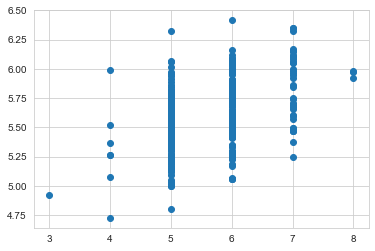

In [74]:
plt.scatter(ym10_test,predictions_m10)

**Residual Histogram**

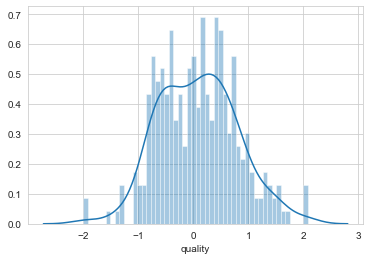

In [75]:
sns.distplot((ym10_test-predictions_m10),bins=50);

In [76]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym10_test, predictions_m10))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym10_test, predictions_m10))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym10_test, predictions_m10)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym10_test, predictions_m10))
print('Explained Variance:', metrics.explained_variance_score(ym10_test, predictions_m10))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym10_test, predictions_m10))
print('Median Absolute Error:', metrics.median_absolute_error(ym10_test, predictions_m10))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym10_test, predictions_m10))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym10_test, predictions_m10))

R-squared: 0.15968874996653526
Mean Squared Error (MSE): 0.5064204676853136
Root Mean Squared Error (RMSE): 0.7116322559337186
Log Mean Squared Error: 0.01130629079169475
Explained Variance: 0.1719480601103205
Mean Absolute Error (MAE): 0.5778978013351344
Median Absolute Error: 0.509483586383233
Poisson Deviance: 0.08884461873779294
Mean Gamma Deviance: 0.015783531521732192


## Model 11: Drop Chlorides

In [77]:
ym11 = df.quality
Xm11 = df.drop(['quality','fixed_acidity','total_sulfur_dioxide','free_sulfur_dioxide','residual_sugar','alcohol','residual_sugar','citric_acid','pH','sulphates','chlorides'],axis=1)
from sklearn.model_selection import train_test_split
Xm11_train, Xm11_test, ym11_train, ym11_test = train_test_split(Xm11, ym11, test_size=0.25, random_state=101)
Xm11_train.head()


,volatile_acidity,density
471,0.54,0.99700
1117,0.69,0.99572
1483,0.33,0.99542
1209,0.39,0.99428
714,0.74,0.99800


In [78]:
Xm11_train.shape

(851, 2)

In [79]:
from sklearn.linear_model import LinearRegression
lm11 = LinearRegression()
lm11.fit(Xm11_train,ym11_train)
print('Estimated intercept coefficient:',lm11.intercept_)
print ('Number of coefficients:', len(lm11.coef_))
coeffm11_df = pd.DataFrame(lm11.coef_,Xm11.columns,columns=['Coefficient'])
coeffm11_df

Estimated intercept coefficient: 91.04575782403515
Number of coefficients: 2


,Coefficient
volatile_acidity,-1.637362
density,-84.866488


In [80]:
predictions_m11 = lm11.predict(Xm11_test)

**Predicted vs. Actual**

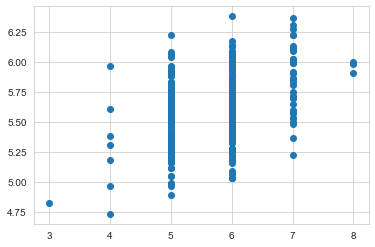

In [81]:
plt.scatter(ym11_test,predictions_m11)

**Residual Histogram**

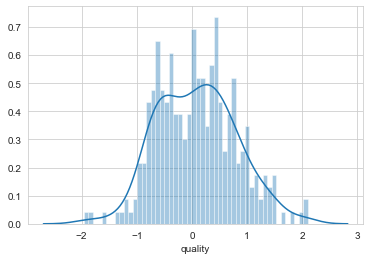

In [82]:
sns.distplot((ym11_test-predictions_m11),bins=50);

In [83]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym11_test, predictions_m11))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym11_test, predictions_m11))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym11_test, predictions_m11)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym11_test, predictions_m11))
print('Explained Variance:', metrics.explained_variance_score(ym11_test, predictions_m11))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym11_test, predictions_m11))
print('Median Absolute Error:', metrics.median_absolute_error(ym11_test, predictions_m11))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym11_test, predictions_m11))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym11_test, predictions_m11))

R-squared: 0.15456405121693173
Mean Squared Error (MSE): 0.5095089094233209
Root Mean Squared Error (RMSE): 0.7137989278664693
Log Mean Squared Error: 0.011363285804590157
Explained Variance: 0.1669747912805335
Mean Absolute Error (MAE): 0.5816181144119403
Median Absolute Error: 0.5113085172067073
Poisson Deviance: 0.08937160026572362
Mean Gamma Deviance: 0.0158727839755951
